##Install dependences

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.7 MB/s eta 0:00:0

##Import package

In [ ]:
import requests
import csv
import os
import gdown
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch  
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import RobertaForSequenceClassification, AutoTokenizer, get_scheduler
from datasets import Dataset, DatasetDict

##Down dataset

In [ ]:
path_train = "train.csv"
path_val = "val.csv"
path_test = "test.csv"

###Imcomplete version datadet

In [ ]:
# url_train = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=train"
# url_val = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=validation"
# url_test = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=test"

# def json2csv(url, out):
#   request = requests.get(url_train)
#   if request.status_code == 200:
#     json = request.json()
#     with open(out, 'w') as data:
#       f = csv.writer(data)
#       f.writerow(list(json['rows'][0]['row'].keys())[:-1])
#       for it in json['rows']:
#         f.writerow(list(it['row'].values())[:-1])

# json2csv(url_train, path_train)
# json2csv(url_val, path_val)
# json2csv(url_test, path_test)

###Complete version datadet

In [ ]:
if not os.path.exists('tmp'):
  os.mkdir('tmp')
    
filename_down = (
  ("https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download", "tmp/train_sentence.txt"),
  ("https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download", "tmp/train_sentiment.txt"),
  ("https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download", "tmp/val_sentence.txt"),
  ("https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download", "tmp/val_sentiment.txt"),
  ("https://drive.google.com/uc?id=1aNMOeZZbNwSRkjyCWAGtNCMa3YrshR-n&export=download", "tmp/test_sentence.txt"),
  ("https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO&export=download", "tmp/test_sentiment.txt")
)

for it in filename_down:
  gdown.download(it[0], it[1], quiet=False)

def concat_data(url1, url2, out):
  with open(url1, 'r') as f:
    df1 = f.read().split('\n')[:-1]
  with open(url2, 'r') as f:
    df2 = f.read().split('\n')[:-1]
  
  df = pd.DataFrame({'sentence': df1,  'sentiment': df2})
  df.to_csv(out, index=False)

concat_data('tmp/train_sentence.txt', 'tmp/train_sentiment.txt', path_train)
concat_data('tmp/val_sentence.txt', 'tmp/val_sentiment.txt', path_val)
concat_data('tmp/test_sentence.txt', 'tmp/test_sentiment.txt', path_test)

shutil.rmtree('tmp')

Downloading...
From: https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download
To: /content/tmp/train_sentence.txt
100%|██████████| 898k/898k [00:00<00:00, 34.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download
To: /content/tmp/train_sentiment.txt
100%|██████████| 22.9k/22.9k [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download
To: /content/tmp/val_sentence.txt
100%|██████████| 119k/119k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download
To: /content/tmp/val_sentiment.txt
100%|██████████| 3.17k/3.17k [00:00<00:00, 14.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aNMOeZZbNwSRkjyCWAGtNCMa3YrshR-n&export=download
To: /content/tmp/test_sentence.txt
100%|██████████| 248k/248k [00:00<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1v

##Preprocessing

In [ ]:
df_train = pd.read_csv(path_train)
df_val = pd.read_csv(path_val)
df_test = pd.read_csv(path_test)
df_train.head()

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


In [ ]:
print(f'shape of train data is {df_train.shape}')
print(f'shape of val data is {df_val.shape}')
print(f'shape of test data is {df_test.shape}')

shape of train data is (11426, 2)
shape of val data is (1583, 2)
shape of test data is (3166, 2)


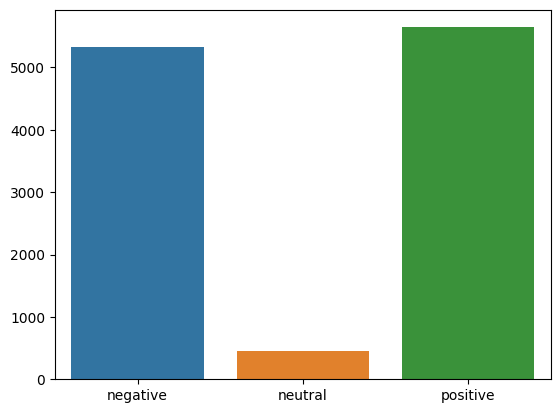

In [ ]:
dd = pd.Series(df_train['sentiment']).value_counts().sort_index()
sns.barplot(x=np.array(['negative', 'neutral', 'positive']), y=dd.values)
plt.show()

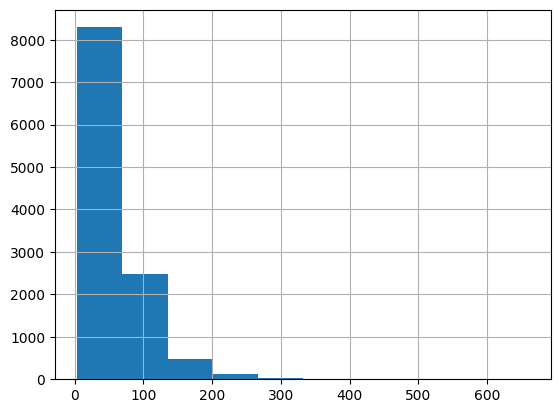

count    11426.000000
mean        59.084894
std         43.085202
min          4.000000
25%         31.000000
50%         47.000000
75%         73.000000
max        660.000000
dtype: float64

In [ ]:
rev_len = [len(i) for i in df_train['sentence']]
max_length = max(rev_len)
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [ ]:
df_train_new = pd.DataFrame(np.repeat(df_train[df_train['sentiment'] == 1].values, 10, axis=0), columns=df_train.columns)
df_train = pd.concat([df_train, df_train_new], axis=0).reset_index(drop=True)
df_train.head()

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


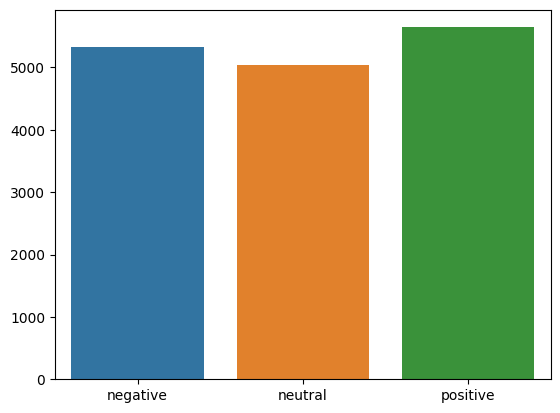

In [ ]:
dd = pd.Series(df_train['sentiment']).value_counts().sort_index()
sns.barplot(x=np.array(['negative', 'neutral', 'positive']), y=dd.values)
plt.show()

##Train

In [ ]:
dataset = DatasetDict({'train': Dataset.from_pandas(df_train), 'val': Dataset.from_pandas(df_val), 'test': Dataset.from_pandas(df_test)})
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 16006
    })
    val: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 1583
    })
    test: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 3166
    })
})

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("vinai/phobert-base-v2", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weig

In [ ]:
max_length = 128
def tokenize_function(examples):
  return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=max_length)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/16006 [00:00<?, ? examples/s]

Map:   0%|          | 0/1583 [00:00<?, ? examples/s]

Map:   0%|          | 0/3166 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["sentence"])
tokenized_datasets = tokenized_datasets.rename_column("sentiment", "labels")
tokenized_datasets.set_format("torch")

In [ ]:
train_dataloader = DataLoader(tokenized_datasets['train'], shuffle=True, batch_size=64)
val_dataloader = DataLoader(tokenized_datasets['val'], batch_size=64)
test_dataloader = DataLoader(tokenized_datasets['test'], batch_size=64)

In [ ]:
device = ('cpu', 'cuda')[torch.cuda.is_available()]

optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
  name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

model.to(device);

In [ ]:
model_path = './weights/'
min_val_loss = float('inf')
history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}
for epoch in tqdm(range(10), desc='Epoch'):
  train_loss = 0
  train_acc = 0
  model.train()
  for batch in tqdm(train_dataloader, desc=f'Train {epoch}', leave=False):
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)
    loss = outputs.loss
    loss.backward()

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()

    train_loss += loss.cpu().detach().numpy()
    train_acc += (torch.argmax(outputs.logits, dim=-1) == batch['labels']).float().mean().cpu().detach().numpy()
  train_loss = train_loss/len(train_dataloader)
  train_acc = train_acc/len(train_dataloader)
  
  val_loss = 0
  val_acc = 0
  model.eval()
  for batch in tqdm(val_dataloader, desc=f'Val {epoch}', leave=False):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
      outputs = model(**batch)

    val_loss += loss.cpu().detach().numpy()
    val_acc += (torch.argmax(outputs.logits, dim=-1) == batch['labels']).float().mean().cpu().detach().numpy()
  val_loss = val_loss/len(val_dataloader)
  val_acc = val_acc/len(val_dataloader)

  history['accuracy'].append(train_acc)
  history['loss'].append(train_loss)
  history['val_accuracy'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_loss < min_val_loss:
    min_val_loss = val_loss
    model.save_pretrained(model_path)
    
print('min_val_loss:', min_val_loss)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train 0:   0%|          | 0/251 [00:00<?, ?it/s]

Val 0:   0%|          | 0/25 [00:00<?, ?it/s]

Train 1:   0%|          | 0/251 [00:00<?, ?it/s]

Val 1:   0%|          | 0/25 [00:00<?, ?it/s]

Train 2:   0%|          | 0/251 [00:00<?, ?it/s]

Val 2:   0%|          | 0/25 [00:00<?, ?it/s]

Train 3:   0%|          | 0/251 [00:00<?, ?it/s]

Val 3:   0%|          | 0/25 [00:00<?, ?it/s]

Train 4:   0%|          | 0/251 [00:00<?, ?it/s]

Val 4:   0%|          | 0/25 [00:00<?, ?it/s]

Train 5:   0%|          | 0/251 [00:00<?, ?it/s]

Val 5:   0%|          | 0/25 [00:00<?, ?it/s]

Train 6:   0%|          | 0/251 [00:00<?, ?it/s]

Val 6:   0%|          | 0/25 [00:00<?, ?it/s]

Train 7:   0%|          | 0/251 [00:00<?, ?it/s]

Val 7:   0%|          | 0/25 [00:00<?, ?it/s]

Train 8:   0%|          | 0/251 [00:00<?, ?it/s]

Val 8:   0%|          | 0/25 [00:00<?, ?it/s]

Train 9:   0%|          | 0/251 [00:00<?, ?it/s]

Val 9:   0%|          | 0/25 [00:00<?, ?it/s]

min_val_loss: 0.006456729024648666


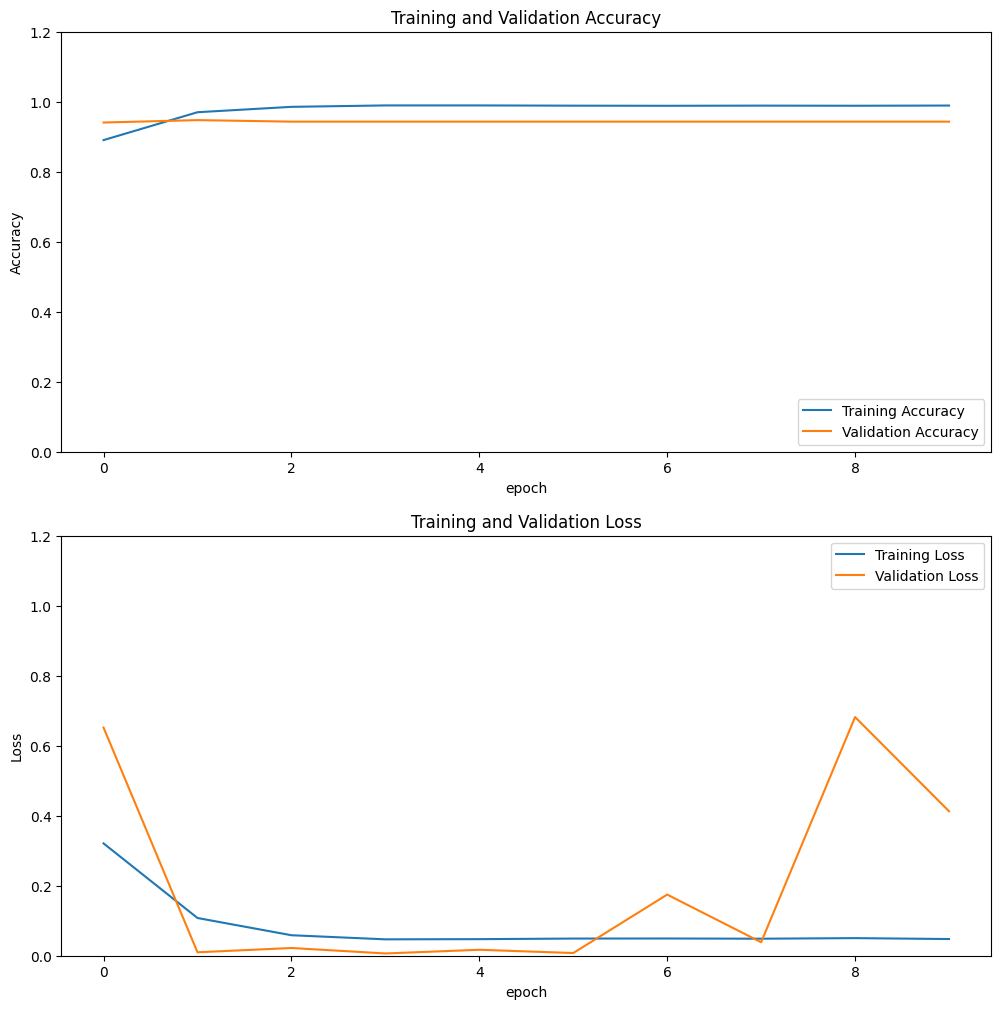

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.ylim([0,1.2])
plt.title('Training and Validation Loss');

In [ ]:
from sklearn.metrics import f1_score

y_pre, y_tru = [], []
model_test = RobertaForSequenceClassification.from_pretrained(model_path, num_labels=3)
model_test.to(device)
model_test.eval()
for batch in test_dataloader:
  batch = {k: v.to(device) for k, v in batch.items()}
  with torch.no_grad():
    outputs = model_test(**batch)

  logits = outputs.logits
  predictions = torch.argmax(logits, dim=-1)
  y_pre.extend(predictions.cpu())
  y_tru.extend(batch['labels'].cpu())

f1_score(y_tru, y_pre, average='macro')

0.8252139116590604

In [ ]:
!du -sh -- *

55M	sample_data
252K	test.csv
912K	train.csv
124K	val.csv
516M	weights


##Predict

In [ ]:
def predict(txt: str, model):
  labels = ('negative', 'neutral', 'positive')

  inp = tokenizer(txt, return_tensors="pt")
  inp = {k: v.to(device) for k, v in inp.items()}

  model.eval()
  with torch.no_grad():
    outputs = model(**inp)

  return labels[torch.argmax(outputs.logits, dim=-1)]

In [ ]:
txt = 'Cụng tạm thôi :))'

predict(txt, model_test)

'neutral'

##Push to HuggingFace hub

In [ ]:
# !pip install huggingface_hub

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

CommitInfo(commit_url='https://huggingface.co/AidenDam/PhoBERT_Sentiment_analysis/commit/fc6a56ed7afbc1f31bda6d48cb88a5a9d07e7e91', commit_message='batch_size=64; f1-score=0.82', commit_description='', oid='fc6a56ed7afbc1f31bda6d48cb88a5a9d07e7e91', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# model_test.push_to_hub('AidenDam/PhoBERT_Sentiment_analysis', commit_message='batch_size=64; f1-score=0.82')